In [5]:
import pandas as pd
import numpy as np
#course = pd.read_csv("course.csv") 
#course_element = pd.read_csv("course_element.csv") 
#course_module = pd.read_csv("course_module.csv") 

#sol_log = pd.read_csv("solution_log.csv") 
#u_course_progress = pd.read_csv("user_course_progress.csv") 
#u_element_progress = pd.read_csv("user_element_progress.csv") 
u_module_progress = pd.read_csv("user_module_progress.csv")

C:\Users\Ivan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
u_course_progress = pd.read_csv('user_course_progress.csv', encoding='utf-8',)
u_modules_achieved = u_course_progress.groupby('user_id')['modules_achieved'].sum().reset_index()
user_id = u_modules_achieved[u_modules_achieved['modules_achieved'] > 0]['user_id']
u_course_progress = u_course_progress.merge(user_id, on='user_id')
data_time_begin = u_course_progress.time_created
data_time_end = u_course_progress.time_updated

In [7]:

u_course_progress.time_created = pd.to_datetime(u_course_progress.time_created)
u_course_progress.time_updated = pd.to_datetime(u_course_progress.time_updated)
u_course_progress['time_lead'] = u_course_progress['time_updated'] - u_course_progress['time_created']
u_course_progress['time_lead_sec'] = u_course_progress['time_lead'].dt.total_seconds()
u_course_progress['speed'] = 1000000 * (u_course_progress['modules_achieved'] + u_course_progress['advanced_modules_done']) / u_course_progress['time_lead_sec']
u_course_progress['speed1'] = 1000000 *  u_course_progress['advanced_modules_done'] / u_course_progress['time_lead_sec']
u_course_progress['speed2'] = 1000000 * u_course_progress['modules_achieved'] / u_course_progress['time_lead_sec']
u_course_progress.to_csv("speeds.csv", index = False)
u_course_progress.head()

,id,user_id,course_id,modules_achieved,advanced_modules_done,time_created,time_updated,modules_closed,modules_done,time_lead,time_lead_sec,speed,speed1,speed2
0,787,100120060114846069,3,0,0,NaT,2019-06-05 16:45:32.140810,0,0,NaT,NaN,NaN,NaN,NaN
1,67371,100120060114846069,35,1,0,2020-01-04 19:47:21.610538,2020-01-09 19:57:26.780294,0,0,5 days 00:10:05.169756,4.326052e+05,2.311577,0.000000,2.311577
2,177255,100120060114846069,89,1,0,2020-05-26 19:39:05.141363,2020-05-26 19:51:18.761838,0,0,0 days 00:12:13.620475,7.336205e+02,1363.102632,0.000000,1363.102632
3,2681,100120060110982009,3,8,2,2019-03-22 15:42:21.255839,2019-06-14 11:48:47.039643,1,2,83 days 20:06:25.783804,7.243586e+06,1.380532,0.276106,1.104425
4,55045,100120060110982009,35,3,0,2019-11-06 17:35:43.402597,2019-11-30 18:29:11.632461,1,1,24 days 00:53:28.229864,2.076808e+06,1.444524,0.000000,1.444524


In [38]:
print(u_module_progress)

             id             user_id  course_id  course_module_id  \
0        503562  100120050110012222          3                52   
1         46805  100120050111530528          3                59   
2         46803  100120050111530528          3                58   
3         46798  100120050111530528          3                57   
4        482893  100120050110594123          3                52   
...         ...                 ...        ...               ...   
544080  3031824  100120060111064985        237              2233   
544081  3060930  100120070110738843        237              2214   
544082  3060929  100120070110738843        237              2223   
544083  3060928  100120070110738843        237              2213   
544084  3060927  100120070110738843        237              2222   

        progress_current  progress_failed  steps_done  is_achieved  is_closed  \
0                    0.0              0.0           0        False      False   
1                    

<AxesSubplot:>

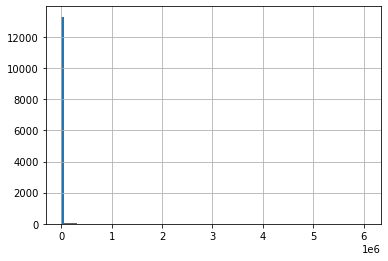

In [41]:
u_course_progress = pd.read_csv('user_course_progress.csv', encoding='utf-8',)
print(u_course_progress)

           id             user_id  course_id  modules_achieved  \
0        2020  100120050111530528          3                 0   
1       43519  100120050110043028          3                 0   
2       26692  100120030111070018          3                 0   
3         787  100120060114846069          3                 0   
4        2681  100120060110982009          3                 8   
...       ...                 ...        ...               ...   
26179  202673  100119790111022302        237                 0   
26180  202230  100120060110010662        237                 0   
26181  200338  100119750110038578        237                 0   
26182  199512  100120040111161458        237                 0   
26183  199311  100120070111506548        237                 0   

       advanced_modules_done                time_created  \
0                          0                         NaN   
1                          0  2019-05-06 19:22:12.861890   
2                          